### Создание графа Mobility network

In [93]:
import numpy as np
import re
from time import sleep
import chess 
import chess.pgn
import networkx as nx
import matplotlib.pyplot as plt

In [160]:
class Cell: 
    def __init__(self, x, y, t, c): 
        self.x = x 
        self.y = y 
        self.type = t
        self.color = c
        # вектор с "координатами" клеток, попадющих под бой фигуры, стоящей на этой клетке
        self.attack = [] 
        # вектор фигур, атакующих эту клетку
        self.attacked = []
        
def move_by_black_pawn(pawn, cells):
    if (pawn.x - 1 >= 0) and (cells[pawn.x - 1][pawn.y].color == 0):
        pawn.attack.append((cells[pawn.x - 1][pawn.y].type, pawn.x - 1, pawn.y)) 
        cells[pawn.x - 1][pawn.y].attacked.append(pawn)
    if (pawn.x == 6) and (cells[pawn.x - 2][pawn.y].color == 0):
        pawn.attack.append((cells[pawn.x - 2][pawn.y].type, pawn.x - 2, pawn.y)) 
        cells[pawn.x - 2][pawn.y].attacked.append(pawn)
        
def move_by_white_pawn(pawn, cells):
    if (pawn.x + 1 < 8) and (cells[pawn.x + 1][pawn.y].color == 0):
        pawn.attack.append((cells[pawn.x + 1][pawn.y].type, pawn.x + 1, pawn.y)) 
        cells[pawn.x + 1][pawn.y].attacked.append(pawn)
    if pawn.x == 1 and (cells[pawn.x + 2][pawn.y].color == 0):
        pawn.attack.append((cells[pawn.x + 2][pawn.y].type, pawn.x + 2, pawn.y)) 
        cells[pawn.x + 2][pawn.y].attacked.append(pawn) 
    
def attack_by_black_pawn(pawn, cells):
    if (pawn.x - 1 >= 0) and (pawn.y - 1 >= 0) and (cells[pawn.x - 1][pawn.y - 1].color == 0 - pawn.color): 
        pawn.attack.append((cells[pawn.x - 1][pawn.y - 1].type, pawn.x - 1, pawn.y - 1)) 
        cells[pawn.x - 1][pawn.y - 1].attacked.append(pawn) 
        
    if (pawn.x - 1 >= 0) and (pawn.y + 1 < 8) and (cells[pawn.x - 1][pawn.y + 1].color == 0 - pawn.color): 
        pawn.attack.append((cells[pawn.x - 1][pawn.y + 1].type, pawn.x - 1, pawn.y + 1)) 
        cells[pawn.x - 1][pawn.y + 1].attacked.append(pawn)
        
def attack_by_white_pawn(pawn, cells):
    if (pawn.x + 1 < 8) and (pawn.y - 1 >= 0) and (cells[pawn.x + 1][pawn.y - 1].color == 0 - pawn.color): 
        pawn.attack.append((cells[pawn.x + 1][pawn.y - 1].type, pawn.x + 1, pawn.y - 1)) 
        cells[pawn.x + 1][pawn.y - 1].attacked.append(pawn) 
        
    if (pawn.x + 1 < 8) and (pawn.y + 1 < 8) and (cells[pawn.x + 1][pawn.y + 1].color == 0 - pawn.color): 
        pawn.attack.append((cells[pawn.x + 1][pawn.y + 1].type, pawn.x + 1, pawn.y + 1)) 
        cells[pawn.x + 1][pawn.y + 1].attacked.append(pawn)

def attack_by_knight(knight, cells): 
    moves = [(-1, 2), 
             (-2, 1), 
             (-2, -1), 
             (-1, -2), 
             (1, -2), 
             (2, -1), 
             (2, 1), 
             (1, 2)]
    
    for move in moves: 
        if (knight.x + move[0] >= 0) and (knight.x + move[0] < 8) and (knight.y + move[1] >= 0) and (knight.y + move[1] < 8) and (knight.color != cells[knight.x + move[0]][knight.y + move[1]].color): 
            knight.attack.append((cells[knight.x + move[0]][knight.y + move[1]].type, knight.x + move[0], knight.y + move[1])) 
            cells[knight.x + move[0]][knight.y + move[1]].attacked.append(knight)
            
def attack_by_bishop(bishop, cells): 
    move_x = bishop.x + 1 
    move_y = bishop.y + 1 
    
    while (move_x < 8) and (move_y < 8): 
        if (bishop.color != cells[move_x][move_y].color):
            bishop.attack.append((cells[move_x][move_y].type, move_x, move_y)) 
            cells[move_x][move_y].attacked.append(bishop) 
        
        if cells[move_x][move_y].type != 0: 
            break 
            
        move_x += 1 
        move_y += 1

    move_x = bishop.x + 1
    move_y = bishop.y - 1
    while (move_x < 8) and (move_y >= 0):
        if (bishop.color != cells[move_x][move_y].color):
            bishop.attack.append((cells[move_x][move_y].type, move_x, move_y))
            cells[move_x][move_y].attacked.append(bishop)
        
        if cells[move_x][move_y].type != 0:
            break
            
        move_x += 1
        move_y -= 1

    move_x = bishop.x - 1
    move_y = bishop.y - 1
    
    while (move_x >= 0) and (move_y >= 0):
        if (bishop.color != cells[move_x][move_y].color):
            bishop.attack.append((cells[move_x][move_y].type, move_x, move_y))
            cells[move_x][move_y].attacked.append(bishop)
        
        if cells[move_x][move_y].type != 0:
            break
            
        move_x -= 1
        move_y -= 1

    move_x = bishop.x - 1
    move_y = bishop.y + 1
    
    while (move_x >= 0) and (move_y < 8):
        if (bishop.color != cells[move_x][move_y].color):
            bishop.attack.append((cells[move_x][move_y].type, move_x, move_y))
            cells[move_x][move_y].attacked.append(bishop)
        
        if cells[move_x][move_y].type != 0:
            break
            
        move_x -= 1
        move_y += 1

        
def attack_by_rook(rook, cells): 
    move_x = rook.x + 1 
    
    while move_x < 8:
        if (rook.color != cells[move_x][rook.y].color):
            rook.attack.append((cells[move_x][rook.y].type, move_x, rook.y)) 
            cells[move_x][rook.y].attacked.append(rook) 
        
        if cells[move_x][rook.y].type != 0: 
            break 
        move_x += 1

    move_x = rook.x - 1
    
    while move_x >= 0:
        if (rook.color != cells[move_x][rook.y].color):
            rook.attack.append((cells[move_x][rook.y].type, move_x, rook.y))
            cells[move_x][rook.y].attacked.append(rook)
            
        if cells[move_x][rook.y].type != 0:
            break
        move_x -= 1

    move_y = rook.y + 1
    
    while move_y < 8:
        if (rook.color != cells[rook.x][move_y].color):
            rook.attack.append((cells[rook.x][move_y].type, rook.x, move_y))
            cells[rook.x][move_y].attacked.append(rook)
            
        if cells[rook.x][move_y].type != 0:
            break
        move_y += 1

    move_y = rook.y - 1
    
    while move_y >= 0:
        if (rook.color != cells[rook.x][move_y].color):
            rook.attack.append((cells[rook.x][move_y].type, rook.x, move_y))
            cells[rook.x][move_y].attacked.append(rook)
            
        if cells[rook.x][move_y].type != 0:
            break
        move_y -= 1

        
def attack_by_queen(queen, cells): 
    attack_by_rook(queen, cells) 
    attack_by_bishop(queen, cells)
    
    

def attack_by_king(king, cells): 
    moves = [(-1, 0), (-1, 1), (-1, -1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)] 
    
    for move in moves: 
        if (king.x + move[0] >= 0) and (king.x + move[0] < 8) and (king.y + move[1] >= 0) and (king.y + move[1] < 8) and (king.color != cells[king.x + move[0]][king.y + move[1]].color): 
            king.attack.append((cells[king.x + move[0]][king.y + move[1]].type, king.x + move[0], king.y + move[1])) 
            cells[king.x + move[0]][king.y + move[1]].attacked.append(king)

def castling_king(king, cells, board):
    if king.color == 1:
        if board.has_kingside_castling_rights(chess.WHITE) and cells[0][5].color == 0 and cells[0][6].color == 0:
            king.attack.append((cells[0][6].type, 0, 6))
            cells[0][6].attacked.append(king)
        elif board.has_queenside_castling_rights(chess.WHITE) and cells[0][1].color == 0 and cells[0][2].color == 0 and cells[0][3].color == 0:
            king.attack.append((cells[0][2].type, 0, 2))
            cells[0][2].attacked.append(king)
    
    if king.color == -1:
        if board.has_kingside_castling_rights(chess.BLACK) and cells[7][5].color == 0 and cells[7][6].color == 0:
            king.attack.append((cells[7][6].type, 7, 6))
            cells[7][6].attacked.append(king)
        elif board.has_queenside_castling_rights(chess.BLACK) and cells[7][1].color == 0 and cells[7][2].color == 0 and cells[7][3].color == 0:
            king.attack.append((cells[7][2].type, 7, 2))
            cells[7][2].attacked.append(king)
                               
def castling_rook(rook, cells, board):
    if rook.color == 1:
        if board.has_kingside_castling_rights(chess.WHITE) and cells[0][5].color == 0 and cells[0][6].color == 0:
            rook.attack.append((cells[0][5].type, 0, 5))
            cells[0][5].attacked.append(rook)
        elif board.has_queenside_castling_rights(chess.WHITE) and cells[0][1].color == 0 and cells[0][2].color == 0 and cells[0][3].color == 0:
            rook.attack.append((cells[0][3].type, 0, 3))
            cells[0][3].attacked.append(rook)
    
    if rook.color == -1:
        if board.has_kingside_castling_rights(chess.BLACK) and cells[7][5].color == 0 and cells[7][6].color == 0:
            rook.attack.append((cells[7][5].type, 7, 5))
            cells[7][5].attacked.append(rook)
        elif board.has_queenside_castling_rights(chess.BLACK) and cells[7][1].color == 0 and cells[7][2].color == 0 and cells[7][3].color == 0:
            rook.attack.append((cells[7][3].type, 7, 3))
            cells[7][3].attacked.append(rook)

In [161]:
def define_figures(board, chess_board): 
    figures = [] 
    cells = [[] for _ in range(8)] 

    for i in range(8): 
        for j in range(8): 
            if board[i][j] == 0:
                cells[i].append(Cell(i, j, board[i][j], 0))
            elif board[i][j].islower():
                figures.append(Cell(i, j, board[i][j], -1))
                cells[i].append(Cell(i, j, board[i][j], -1))
            elif board[i][j].isupper():
                figures.append(Cell(i, j, board[i][j], 1))
                cells[i].append(Cell(i, j, board[i][j], 1))


    for figure in figures: 
        if figure.type == 'p':
            move_by_black_pawn(figure, cells)
            attack_by_black_pawn(figure, cells)
        elif figure.type == 'P': 
            move_by_white_pawn(figure, cells)
            attack_by_white_pawn(figure, cells)
        elif figure.type == 'n' or figure.type == 'N': 
            attack_by_knight(figure, cells)
        elif figure.type == 'b' or figure.type == 'B': 
            attack_by_bishop(figure, cells) 
        elif figure.type == 'r' or figure.type == 'R': 
            attack_by_rook(figure, cells)
            castling_rook(figure, cells, chess_board)
        elif figure.type == 'q' or figure.type == 'Q': 
            attack_by_queen(figure, cells) 
            
        elif figure.type == 'k' or figure.type == 'K': 
            attack_by_king(figure, cells)
            castling_king(figure, cells, chess_board)
            
    return figures

In [162]:
def board_to_array(board):
    # Создаем пустой двумерный массив размером 8x8
    board_array = [[None for j in range(8)] for i in range(8)]

    # Проходим по каждой позиции на шахматной доске
    for row in range(8):
        for col in range(8):
            # Получаем фигуру с позиции и преобразуем её в символ
            piece = board.piece_at(8 * row + col)
            symbol = piece.symbol() if piece else 0

            # Сохраняем символ фигуры в двумерный массив
            board_array[row][col] = symbol

    return board_array

In [163]:
def create_mobility_network(input_file_path):
    if not os.path.exists(output_dir): 
        os.makedirs(output_dir)
    total_games = 100
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    with open(input_file_path) as pgn_file:
        for i in tqdm(range(total_games), desc="Processing games", unit="game"):
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            board = chess.Board()
            for number, move in enumerate(game.mainline_moves()): 
                    board.push(move)
                    board_array = board_to_array(board)
                    figures = define_figures(board_array)
                    G = nx.DiGraph()
                    for figure in figures:
                        for cell_attacked in figure.attack:  
                            first = str(figure.type) + letters[figure.y] + str(figure.x + 1)
                            if (cell_attacked[0] != 0):
                                second = str(cell_attacked[0]) + letters[cell_attacked[2]] + str(cell_attacked[1] + 1)
                            else:
                                second = letters[cell_attacked[2]] + str(cell_attacked[1] + 1)

                            G.add_edge(first, second)

                    nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, node_size=1000, node_color=color_map, font_size=8, font_color='black', font_weight='bold')

In [1]:
import os
import pickle

import subprocess
from tqdm import tqdm

def create_graph(board, graphs, letters):
    board_array = board_to_array(board)
    figures = define_figures(board_array, board)
    G = nx.DiGraph()
    for figure in figures:
        for cell_attacked in figure.attack:  
            first = str(figure.type) + letters[figure.y] + str(figure.x + 1)
            if (cell_attacked[0] != 0):
                second = str(cell_attacked[0]) + letters[cell_attacked[2]] + str(cell_attacked[1] + 1)
            else:
                second = letters[cell_attacked[2]] + str(cell_attacked[1] + 1)

            G.add_edge(first, second)
    graphs.append(G)
    
def count_games(input_file_path):
    # Команда, которую мы хотим выполнить в bash
    command = f'grep -o -w "Event" {input_file_path} | wc -l'

    # Выполнение команды и получение вывода
    output = subprocess.check_output(command, shell=True)

    # Преобразование вывода в строку и вывод результата
    count = int(output.decode('utf-8').strip())
    return count

def create_mobility_network(input_file_path, output_dir):
    if not os.path.exists(output_dir): 
        os.makedirs(output_dir)
    total_games = 100
    letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    with open(input_file_path) as pgn_file:
        for i in tqdm(range(total_games), desc="Processing games", unit="game"):
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            board = chess.Board()
            graphs = []
            create_graph(board, graphs, letters)
            for number, move in enumerate(game.mainline_moves()): 
                board.push(move)
                create_graph(board, graphs, letters)
                
            temp = input_file_path.split('.')[0]
            output_path = f'{output_dir}/{temp}_{i}/{game.headers.get("White")}/{game.headers.get("Black")}/{game.headers.get("Result")}/{game.headers.get("WhiteElo")}/{game.headers.get("BlackElo")}/{game.headers.get("Opening")}/{game.headers.get("Variation")}.pickle'
            with open(output_path, "wb") as f:
                pickle.dump(graphs, f)

In [165]:
create_mobility_network("database_part7.pgn", "mobility_network")

Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.72game/s]


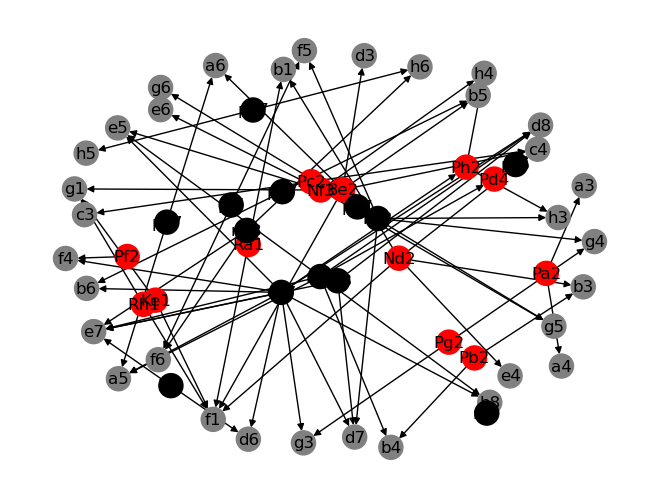

In [166]:
with open("mobility_network/database_part7_0.pickle", 'rb') as f:
    graphs = pickle.load(f)

colors = []
for node in graphs[14].nodes(data=True):
    if len(node[0]) == 2:
        colors.append("grey")
    elif node[0][0].isupper():
        colors.append("red")
    else:
        colors.append("black")

nx.draw(graphs[14], with_labels=True, node_color=colors)

In [167]:
import os
import concurrent.futures

def save_output_to_file(output, file_name):
    with open(file_name, 'w') as f:
        f.write(output)


input_folder = os.getcwd() # Текущая директория
output_folder = 'mobillity_network'

# Создаем папки для изображений и логов, если они ещё не существуют
os.makedirs(output_folder, exist_ok=True)

# Получаем список файлоw, начинающихся с "database_part"
files = [f.split('/')[-1] for f in os.listdir(input_folder) if f.startswith('database_part')]

# Используем ThreadPoolExecutor для выполнения функций в параллельных потоках
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Отправляем задачи на выполнение
    future_to_file = {executor.submit(create_mobility_network, file, output_folder): file for file in files}

    # Обрабатываем результаты выполнения
    for future in concurrent.futures.as_completed(future_to_file):
        file = future_to_file[future]
        try:
            output = future.result()
        except Exception as exc:
            print(f'Файл {file} вызвал исключение: {exc}')
        else:
            print("успех")

Processing games:   0%|                                                                                                                                                           | 0/100 [00:00<?, ?game/s]

Processing games:   0%|                                                                                                                                                           | 0/100 [00:00<?, ?game/s]



Processing games:   0%|                                                                                                                                                           | 0/100 [00:00<?, ?game/s]




Processing games:   0%|                                                                                                                                                           | 0/100 [00:00<?, ?game/s]


Processing games:   2%|██▉                                                                                                                                                

Processing games:   9%|█████████████▏                                                                                                                                     | 9/100 [00:04<00:33,  2.69game/s]



Processing games:   8%|███████████▊                                                                                                                                       | 8/100 [00:04<00:38,  2.38game/s]




Processing games:  11%|████████████████                                                                                                                                  | 11/100 [00:04<00:36,  2.41game/s]







Processing games:   9%|█████████████▏                                                                                                                                     | 9/100 [00:03<00:36,  2.47game/s]





Processing games:   9%|█████████████▏                                                                                                                            

Processing games:  14%|████████████████████▍                                                                                                                             | 14/100 [00:05<00:32,  2.62game/s]



Processing games:  18%|██████████████████████████▎                                                                                                                       | 18/100 [00:07<00:32,  2.52game/s]




Processing games:  18%|██████████████████████████▎                                                                                                                       | 18/100 [00:07<00:33,  2.43game/s]







Processing games:  17%|████████████████████████▊                                                                                                                         | 17/100 [00:06<00:33,  2.45game/s]


Processing games:  18%|██████████████████████████▎                                                                                                                  

Processing games:  24%|███████████████████████████████████                                                                                                               | 24/100 [00:10<00:32,  2.31game/s]

Processing games:  26%|█████████████████████████████████████▉                                                                                                            | 26/100 [00:11<00:31,  2.33game/s]




Processing games:  26%|█████████████████████████████████████▉                                                                                                            | 26/100 [00:10<00:31,  2.37game/s]







Processing games:  25%|████████████████████████████████████▌                                                                                                             | 25/100 [00:10<00:31,  2.35game/s]


Processing games:  26%|█████████████████████████████████████▉                                                                                                         

Processing games:  35%|███████████████████████████████████████████████████                                                                                               | 35/100 [00:14<00:23,  2.75game/s]

Processing games:  34%|█████████████████████████████████████████████████▋                                                                                                | 34/100 [00:14<00:24,  2.73game/s]







Processing games:  33%|████████████████████████████████████████████████▏                                                                                                 | 33/100 [00:13<00:24,  2.77game/s]




Processing games:  34%|█████████████████████████████████████████████████▋                                                                                                | 34/100 [00:13<00:24,  2.70game/s]


Processing games:  34%|█████████████████████████████████████████████████▋                                                                                             

Processing games:  42%|█████████████████████████████████████████████████████████████▎                                                                                    | 42/100 [00:17<00:23,  2.47game/s]

Processing games:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 41/100 [00:17<00:23,  2.48game/s]




Processing games:  42%|█████████████████████████████████████████████████████████████▎                                                                                    | 42/100 [00:17<00:22,  2.58game/s]


Processing games:  42%|█████████████████████████████████████████████████████████████▎                                                                                    | 42/100 [00:17<00:24,  2.39game/s]





Processing games:  41%|███████████████████████████████████████████████████████████▊                                                                                     

Processing games:  50%|█████████████████████████████████████████████████████████████████████████                                                                         | 50/100 [00:20<00:18,  2.73game/s]




Processing games:  50%|█████████████████████████████████████████████████████████████████████████                                                                         | 50/100 [00:20<00:19,  2.57game/s]





Processing games:  49%|███████████████████████████████████████████████████████████████████████▌                                                                          | 49/100 [00:20<00:17,  2.85game/s]

Processing games:  49%|███████████████████████████████████████████████████████████████████████▌                                                                          | 49/100 [00:20<00:19,  2.56game/s]


Processing games:  50%|█████████████████████████████████████████████████████████████████████████                                                                        

Processing games:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                             | 58/100 [00:24<00:16,  2.53game/s]






Processing games:  55%|████████████████████████████████████████████████████████████████████████████████▎                                                                 | 55/100 [00:23<00:18,  2.47game/s]





Processing games:  57%|███████████████████████████████████████████████████████████████████████████████████▏                                                              | 57/100 [00:23<00:16,  2.63game/s]




Processing games:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                             | 58/100 [00:23<00:17,  2.36game/s]

Processing games:  60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                     

Processing games:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 64/100 [00:27<00:15,  2.25game/s]






Processing games:  63%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 63/100 [00:26<00:16,  2.29game/s]




Processing games:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 68/100 [00:27<00:13,  2.34game/s]





Processing games:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 65/100 [00:27<00:15,  2.27game/s]








Processing games:  63%|███████████████████████████████████████████████████████████████████████████████████████████▉                                          

Processing games:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 76/100 [00:30<00:10,  2.35game/s]






Processing games:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 71/100 [00:30<00:13,  2.19game/s]








Processing games:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 71/100 [00:29<00:12,  2.40game/s]





Processing games:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 73/100 [00:30<00:11,  2.25game/s]



Processing games:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                              

Processing games:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 84/100 [00:34<00:06,  2.50game/s]






Processing games:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 79/100 [00:33<00:08,  2.62game/s]





Processing games:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 81/100 [00:33<00:07,  2.65game/s]

Processing games:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 81/100 [00:34<00:06,  2.74game/s]








Processing games:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     

Processing games:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 90/100 [00:37<00:04,  2.43game/s]





Processing games:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 89/100 [00:36<00:04,  2.47game/s]

Processing games:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 89/100 [00:37<00:04,  2.55game/s]








Processing games:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 87/100 [00:35<00:05,  2.50game/s]







Processing games:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      

Processing games:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 98/100 [00:40<00:00,  2.35game/s]








Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.28game/s]





Processing games:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 97/100 [00:40<00:01,  2.28game/s]







Processing games:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 97/100 [00:39<00:01,  2.47game/s]

Processing games:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

успех
успех






Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.82game/s]







Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.46game/s]







Processing games:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 99/100 [00:40<00:00,  3.20game/s]





Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.91game/s]








Processing games:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

успех
успех


Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.40game/s]




Processing games:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 99/100 [00:41<00:00,  2.49game/s]








Processing games: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.41game/s]

успех
успех
успех
успех
успех
успех
